# Reportando un intervalo

Una forma de resumir las mediciones es reportar un intervalo.

Es decir, condensamos todas las mediciones en dos números:

- los extremos del intervalo: $[x_1, x_2]$
- o, el centro y el ancho del intervalo: $x_0 \pm \Delta x$

In [2]:
import ipywidgets  # funciones interactivas
import matplotlib.pyplot as plt
import numpy as np

plt.rc("figure", dpi=100)

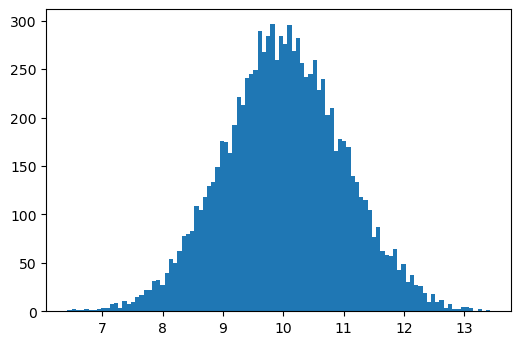

In [17]:
x = np.random.normal(loc=10, scale=1, size=10_000)

plt.hist(x, bins="sqrt");

## Medidas de centralidad

Para elegir un valor para el centro, hay varias [medidas de centralidad](https://en.wikipedia.org/wiki/Central_tendency#Measures), cada una con distintos criterios y propiedades.

Las más utilizadas son soluciones a la pregunta: ¿cuál es **el valor que está "más cerca" de todos**?

Parece un **criterio** razonable, pero: ¿cómo lo calculamos?

Supongamos que tenemos $N$ mediciones $x_i$: $\{x_1, x_2, ..., x_N\}$, y queremos determinar *el centro* $c$.

Primero, calculemos las distancias $d_i$ de nuestras $N$ mediciones $x_i$ a ese valor $c$:

$$d_i = |x_i - c|$$ 

con $i$ de $1$ a $N$.

In [4]:
xn = x[:10]

c_min, c_max = 0.9 * xn.min(), 1.1 * xn.max()


@ipywidgets.interact(c=(c_min, c_max, (c_max - c_min) / 10))
def _(c):
    plt.errorbar(
        np.arange(xn.size),
        xn,
        yerr=(xn - c, np.zeros_like(xn)),
        fmt="o",
        label="Distancias $d_i$",
    )
    plt.axhline(c, color="orange", label="Centro $c$")

    plt.xlabel("Número de medición")
    plt.ylabel("Periodo [s]")
    plt.ylim(c_min, c_max)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

interactive(children=(FloatSlider(value=10.058964028649141, description='c', max=13.028049257453391, min=8.079…

Gráficamente, $d_i$ son las distancias verticales de los puntos azules a la linea naranja.

¿Cómo elegimos *el mejor* $c$, el óptimo?

### Mid-range
1. El que minimiza la distancia a la más lejana.

$$ \max_i d_i = \max_i |x_i - c| $$

que da lugar al "medio rango" o [mid-range](https://en.wikipedia.org/wiki/Mid-range):

$$ c = \frac{x_{min} + x_{max}}{2} $$

In [5]:
# Mid-range
(x.max() + x.min()) / 2

9.96600973721856

### Mediana

2. El que minimiza la suma de distancias:

$$\begin{align}
\sum_i d_i &= d_1 + \ldots + d_N
\\         &= |x_1 -c| + \ldots + |x_N-c|
\end{align}$$

que daría lugar a que $c$ es la [mediana](https://en.wikipedia.org/wiki/Median) de los $x_i$, que es el valor que separa el conjunto ordenado de datos a la mitad.

Por ejemplo,

Para $x_i = \{1, 3, \mathbf{4}, 6, 7\}$, la mediana es $4$.

Para $x_i = \{1, 3, \mathbf{4}, 6, 1000\}$, la mediana también es $4$. Es resistente a *outliers*.

In [6]:
# Mediana
np.median(x)

10.011168681868249

### Media o promedio

En lugar de la suma de las distancias, vamos a minimizar la suma de los cuadrados de las distancias.

Este criterio, que se conoce como [cuadrados mínimos](https://en.wikipedia.org/wiki/Least_squares), es una elección estándar en estadística.

$$\begin{align}
S(c) &= d_1^2 + \ldots + d_N^2
\\   &= |x_1 - c|^2 + \ldots + |x_N - c|^2
\\   &= \sum_{i=1}^N |x_i - c|^2
\end{align}$$

Noten que la suma es una función de una única variable, $c$, ya que los $x_i$ son valores fijos dados por nuestras mediciones.

Podemos gráficar esta función:

Text(0, 0.5, 'S(c)')

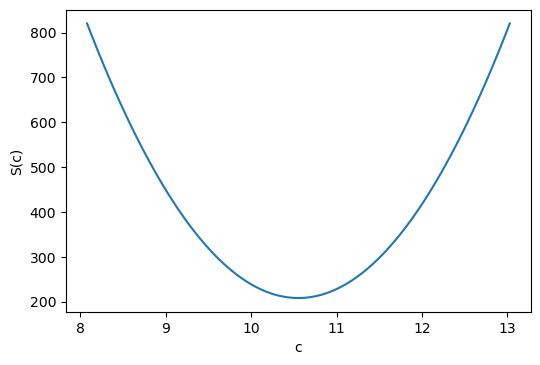

In [7]:
x = np.linspace(c_min, c_max, 100)
y = [np.sum((x - c) ** 2) for c in x]

plt.plot(x, y)
plt.xlabel("c")
plt.ylabel("S(c)")

Para encontrar el mínimo de esta función, derivamos e igualamos a 0:

$$\begin{align}
0 &= \frac{dS}{dc}
\\ \text{reemplazamos la suma S}
\\&= \frac{d}{dc} \sum_{i=1}^N (x_i - c)^2
\\ \text{distribuimos la derivada}
\\&= \sum_{i=1}^N \frac{d}{dc} (x_i - c)^2
\\ \text{regla de la cadena}
\\&= \sum_{i=1}^N -2 \, (x_i - c)
\\ \text{separamos en términos}
\\&= -2 \, \left( \sum_{i=1}^N x_i - \sum_{i=1}^N c \right)
\\ \text{sumamos N veces c}
\\&= -2 \, \left( \sum_{i=1}^N x_i - N c \right)
\end{align}$$

Despejando $c$, llegamos a:

$$ c = \frac{1}{N} \sum_i^N x_i $$

Es decir, el valor óptimo (en el sentido de cuadrados mínimos) es el promedio de los $x_i$, que generalmente se denota como $\bar{x}$ o $\langle x \rangle$.

In [8]:
# Promedio
np.mean(x)

10.553811566783184

#### Outliers

Hay que tener **cuidado con los *outliers*** al calcular un promedio.

A diferencia de la mediana, el promedio no es resistente a *outliers*.

In [9]:
np.array([1, 2, 3, 4, 5]).mean()

3.0

In [11]:
x = np.array([1, 2, 3, 4, 500])

In [14]:
x[x < 10]

array([1, 2, 3, 4])

### Moda

Por completitud, otra medida utilizada comúnmente es la moda, que es el valor que más se repitió en las mediciones.

Por ejemplo, para $\{1, \mathbf{2}, \mathbf{2}, \mathbf{2}, 5, 8\}$ la moda es $2$.

Obviamente, la moda tiene más sentido para variables discretas.

### Extra

Todos estos criterios se pueden ver como una elección particular de una norma sobre las distancias $d_i$:

| Criterio  | Norma      |
|-----------|------------|
| Mid-range | $L^0$      |
| Mediana   | $L^1$      |
| Media     | $L^2$      |
| Moda      | $L^\infty$ |

## Medidas de dispersión

### Varianza y desviación estandar

Para elegir un valor de ancho, al igual que con las medidas de centralidad, hay varias [medidas de dispersión](https://en.wikipedia.org/wiki/Statistical_dispersion#Measures), que cuantifican que tanto se apartan las mediciones entre sí, o de su centro.

La medida que es consistente con el promedio se conoce como la *varianza*, que es el promedio de las distancias cuadráticas al promedio.

O, matemáticamente, que es más claro:

$$ s^2 = \frac{1}{N} \sum_i^N (x_i - \bar{x})^2 = \frac{S(c=\bar{x})}{N}$$

donde $S(c)$ es la suma que definimos antes.

*Nota: tambíen la pueden ver definida con $N-1$ en lugar de $N$, que se conoce como [la corrección de Bessel](https://en.wikipedia.org/wiki/Bessel's_correction).*

In [18]:
# Varianza
np.var(x)

0.9896508561103768

Pero **la varianza no tiene las mismas unidades** que $x_i$.

Por ejemplo, si $x_i$ está en metros, la varianza estará metros cuadrados.

Tomando raiz cuadrada para que tenga las mismas unidades:

$$ s = \sqrt{s^2} = \sqrt{\frac{1}{N} \sum_i^N (x_i - \bar{x})^2} $$

llegamos a lo que se conoce como la desviación estándar.

In [19]:
# Desviación estándar
np.std(x)

0.9948119702287347

### Desviación Absoluta Media (MAD)

$$ \text{mediana}\Big(\big|\,x_i - \text{mediana}(x_i)\,\big|\Big) $$

### Rango intercuartil (IQR)

$$ \text{IQR}(x) = x_{75\%} - x_{25\%} $$

donde $x_{50\%}$ sería la mediana.

### Rango o máximo-mínimo

$$ \text{rango}(x) = x_{max} - x_{min} $$

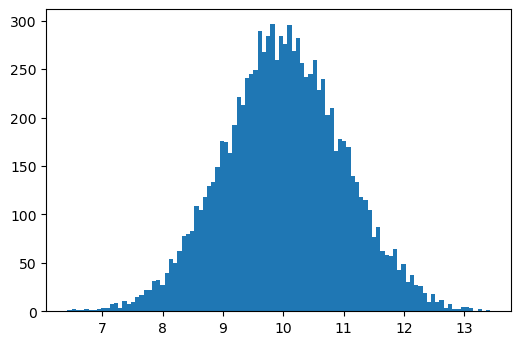

In [20]:
plt.hist(x, bins="sqrt");

In [21]:
x.mean(), x.std()

(10.009417738333404, 0.9948119702287347)

In [26]:
x[:20]

array([ 9.01851967,  8.36517985,  9.74907377,  8.86718795, 10.32971308,
       13.12093763, 11.28872832,  8.64696232,  9.99918935, 10.38336262,
        9.23258165, 10.65307634,  8.59005953, 11.39618437, 10.68020665,
       11.17226718, 11.16035126, 10.18118073,  9.77789787,  9.61221121])

Text(0.5, 0, 'Cantidad de datos')

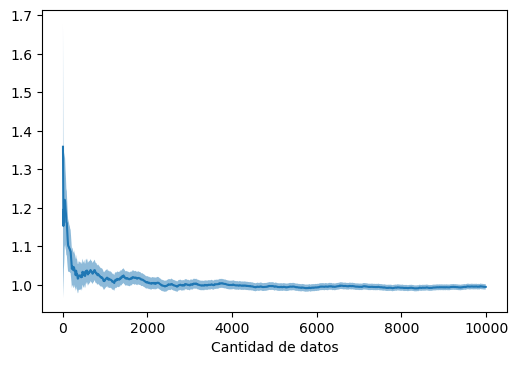

In [34]:
N = np.arange(10, x.size, 10)
desv_est = np.array([x[:n].std() for n in N])
max_min = [x[:n].ptp() for n in N]

def error_desv_est(x):
    return x.std() / (2 * (x.size - 1))**0.5

error_desvest = np.array([error_desv_est(x[:n]) for n in N])

plt.plot(N, desv_est)
plt.fill_between(N, desv_est + error_desvest, desv_est - error_desvest, alpha=0.5)
# plt.plot(max_min)
plt.xlabel("Cantidad de datos")

In [42]:
x[:10].mean()

9.976885456543195

In [43]:
x[10:20].mean()

10.245601679021881

In [44]:
x[20:30].mean()

9.751042453833366

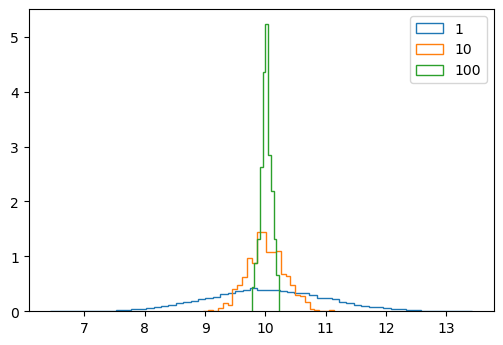

In [48]:
for n in (1, 10, 100):
    plt.hist(x.reshape(n, -1).mean(0), bins="fd", density=True, histtype="step", label=n);
    
plt.legend()

## Errores estadísticos

Calculamos el centro de las mediciones con el promedio,

y su dispesión con la **desviación estándar**,

que es **una medida del error promedio de cada medición**,

que tanto se apartan del centro.

Y acabamos de ver que varían con la cantidad de mediciones $N$.

Entonces, estos valores (como todo) tienen que tener un error.

¿Cómo podemos calcular su error?

### Error del promedio

El promedio es una cuenta sobre nuestros datos $\{x_1, \ldots, x_N\}$:

$$ \bar{x}(x_1, \ldots, x_N) = \frac{x_1 + \ldots + x_N}{N} $$

Entonces, podemos pensarlo como una "medición indirecta",

y calcular su error con la fórmula de propagación:

$$\begin{align}
\sigma^2_\bar{x}
&= \Big( \frac{\partial \bar{x}}{\partial x_1} \sigma_{x_1} \Big)^2 + \ldots + \Big( \frac{\partial \bar{x}}{\partial x_N} \sigma_{x_N} \Big)^2
\\ \text{derivamos}
\\ &= \Big( \frac{1}{N} \sigma_{x_1} \Big)^2 + \ldots + \Big( \frac{1}{N} \sigma_{x_N} \Big)^2
\\ \sigma_{x_i} = \sigma
\\ &= \Big( \frac{1}{N} \sigma_{x} \Big)^2 + \ldots + \Big( \frac{1}{N} \sigma_{x} \Big)^2
\\ \text{N veces el mismo término}
\\ &= N \Big( \frac{1}{N} \sigma_{x} \Big)^2
\\ \text{simplificando}
\\ &= \frac{\sigma_{x}^2}{N}
\end{align}$$

O sea, el error de la media o el promedio es:

$$ \sigma_\bar{x} = \frac{\sigma_x}{\sqrt{N}} $$

### Error de la varianza

Análogamente, podemos hacer lo mismo para la varianza,

$$ s^2 = \frac{1}{N} \sum_i (x_i - \bar{x})^2 $$

y llegar a:

$$ s_{s^2} = \sqrt{\frac{2}{N-1}} \; s^2 $$

*Nota: solo válido para distribuciones normales o gaussianas.*

### Error de la desviación estándar

Análogamente, para la desviación estándar llegamos a que su error es:

$$ s_s = \frac{s}{\sqrt{2 \, (N-1)}} $$

## Resumen

Podemos resumir (algunas) distribuciones de datos con un intervalo,

dando valores para el centro y para el ancho.

Vamos a utilizar la media o promedio para el centro (`np.mean`)

y la desviación estándar para el ancho (`np.std`).

La desviación estandar representa *el error asociado a cada medición*.

A través de la formula de propagación, podemos calcular errores para el promedio y la desviación estandar.

que dependen de la cantidad de datos N.